In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [2]:
# DATA COLLECTION and processing
heart_data = pd.read_csv("/content/heart.csv")

In [3]:
# Defining features (X) and target (y)
X = heart_data.drop(columns='target', axis=1)
y = heart_data['target']


In [4]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [5]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2', None]
}

tree_model = DecisionTreeClassifier(random_state=2)
grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [7]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [8]:
# Plot the best Decision Tree
best_tree_model = grid_search.best_estimator_

# Print decision tree rules
tree_rules = export_text(best_tree_model, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- exang <= 0.35
|   |--- cp <= -0.43
|   |   |--- chol <= 1.22
|   |   |   |--- ca <= -0.25
|   |   |   |   |--- oldpeak <= 1.14
|   |   |   |   |   |--- age <= -1.43
|   |   |   |   |   |   |--- thal <= 0.28
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- thal >  0.28
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  -1.43
|   |   |   |   |   |   |--- oldpeak <= -0.54
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- oldpeak >  -0.54
|   |   |   |   |   |   |   |--- age <= -1.09
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- age >  -1.09
|   |   |   |   |   |   |   |   |--- age <= -0.37
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- age >  -0.37
|   |   |   |   |   |   |   |   |   |--- chol <= -0.22
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- chol >  -0.22
|   |   |   |   |

In [9]:
# Predictions on training set
y_train_pred = best_tree_model.predict(X_train_scaled)

# Predictions on test set
y_test_pred = best_tree_model.predict(X_test_scaled)

# Evaluate on training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate on test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

Train Accuracy (Decision Tree): 1.0
Test Accuracy (Decision Tree): 1.0

Classification Report (Train Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00       421

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



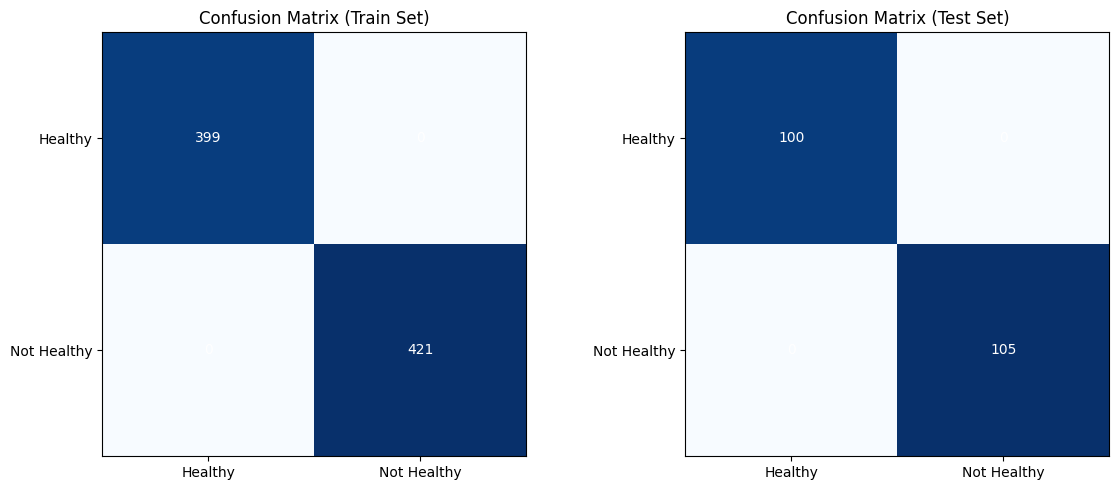

In [10]:
# Displaying evaluation metrics
print('Train Accuracy (Decision Tree):', train_accuracy)
print('Test Accuracy (Decision Tree):', test_accuracy)
print('\nClassification Report (Train Set):\n', classification_report(y_train, y_train_pred))
print('\nClassification Report (Test Set):\n', classification_report(y_test, y_test_pred))

# Plotting confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting confusion matrix for training set
axes[0].imshow(train_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix (Train Set)')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Healthy', 'Not Healthy'])
axes[0].set_yticklabels(['Healthy', 'Not Healthy'])
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, str(train_conf_matrix[i, j]), ha='center', va='center', color='white')

# Plotting confusion matrix for test set
axes[1].imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Confusion Matrix (Test Set)')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Healthy', 'Not Healthy'])
axes[1].set_yticklabels(['Healthy', 'Not Healthy'])
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(test_conf_matrix[i, j]), ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

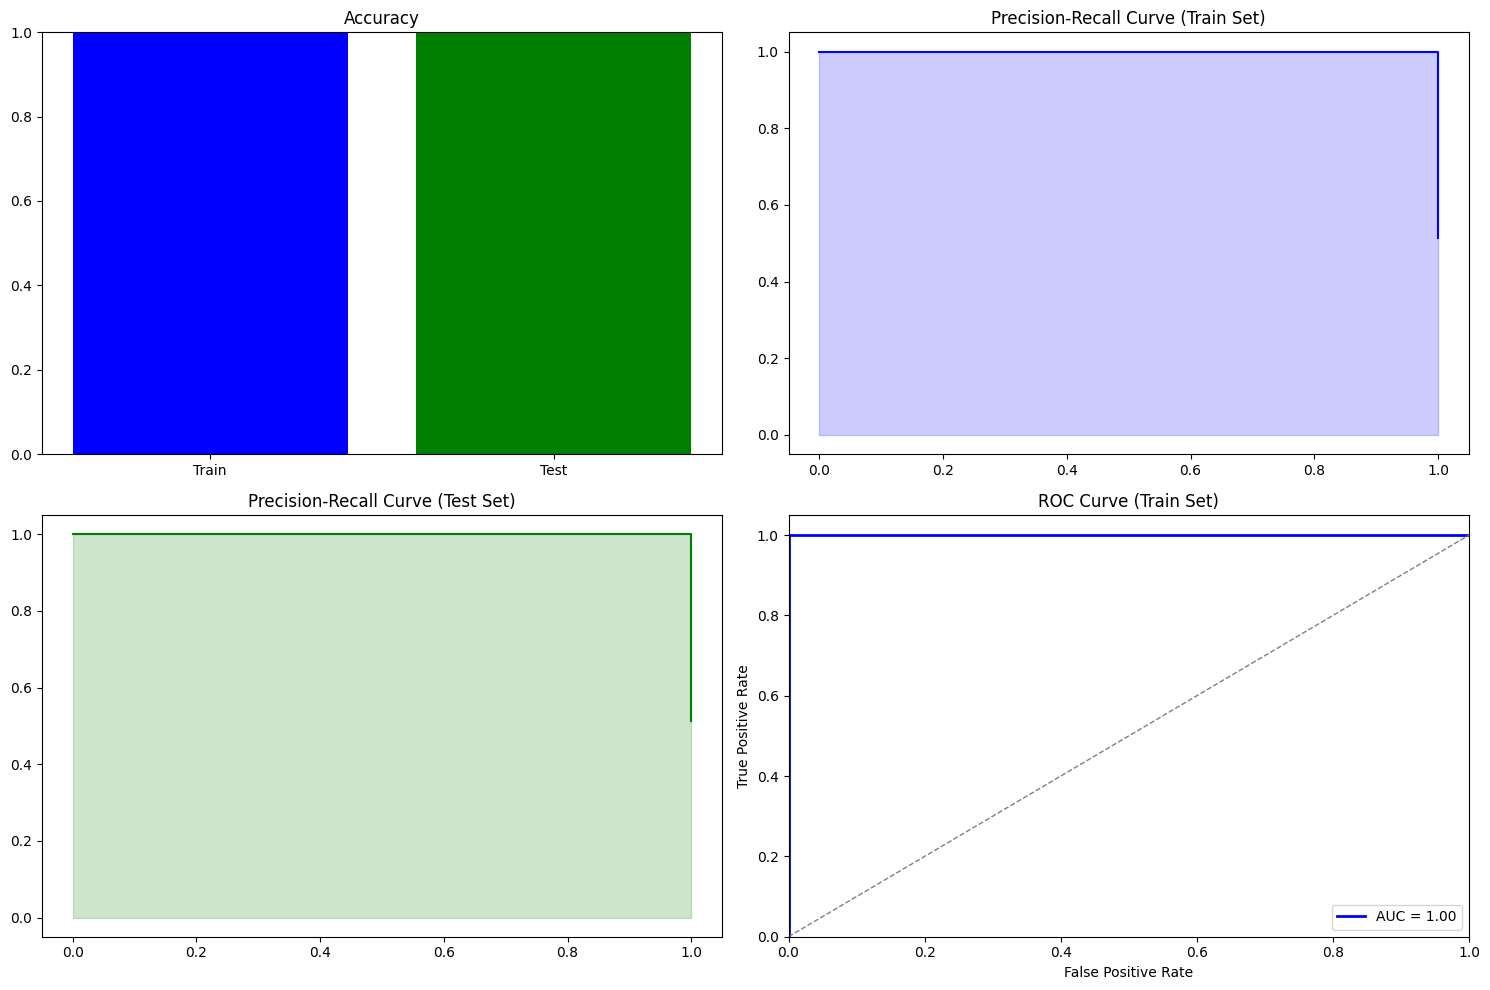

In [11]:
# Plotting precision-recall and ROC curves separately for train and test sets
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting accuracy for train and test sets
axes[0, 0].bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['blue', 'green'])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)

# Plotting precision-recall curve for train set
precision_train, recall_train, _ = precision_recall_curve(y_train, best_tree_model.predict_proba(X_train_scaled)[:, 1])
axes[0, 1].step(recall_train, precision_train, color='b', where='post')
axes[0, 1].fill_between(recall_train, precision_train, step='post', alpha=0.2, color='b')
axes[0, 1].set_title('Precision-Recall Curve (Train Set)')

# Plotting precision-recall curve for test set
precision_test, recall_test, _ = precision_recall_curve(y_test, best_tree_model.predict_proba(X_test_scaled)[:, 1])
axes[1, 0].step(recall_test, precision_test, color='g', where='post')
axes[1, 0].fill_between(recall_test, precision_test, step='post', alpha=0.2, color='g')
axes[1, 0].set_title('Precision-Recall Curve (Test Set)')

# Plotting ROC curve for train set
fpr_train, tpr_train, _ = roc_curve(y_train, best_tree_model.predict_proba(X_train_scaled)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
axes[1, 1].plot(fpr_train, tpr_train, color='b', lw=2, label=f'AUC = {roc_auc_train:.2f}')
axes[1, 1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axes[1, 1].set_xlim([0.0, 1.0])
axes[1, 1].set_ylim([0.0, 1.05])
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('ROC Curve (Train Set)')
axes[1, 1].legend(loc="lower right")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

